In [84]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

%matplotlib inline

In [30]:
def remove_number(text):
    return text.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [31]:
def remove_punctuation(text):
    return (text.str.split(rf'[{string.punctuation}]').str.join(' '))

In [60]:
def remove_whitespace(text):
    return(text.apply(lambda x: ' '.join(x.split())))

In [32]:
def string_replace(text):
    return(text)

In [36]:
def text_to_data(text):
    Category = []
    Text = []
    lines = text.split('\n')
    for line in lines:
        splits = line.split('\t')
        Category.append(splits[0])
        if len(splits) > 1:
            Text.append(splits[1])
        else:
            Text.append(None)
    df = pd.DataFrame({'Category': Category, 'Text': Text})
    return(df)

In [33]:
with open('Data/Spam SMS Collection.txt') as word_file:
        text = word_file.read()

In [37]:
SMS_DF = text_to_data(text)

In [38]:
SMS_DF.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
SMS_DF.shape

(5575, 2)

In [51]:
SMS_DF.isnull().sum()

Category    0
Text        0
dtype: int64

In [52]:
SMS_DF = SMS_DF.dropna()

In [41]:
SMS_DF['Category'] = SMS_DF['Category'].map({'ham': 0, 'spam': 1})

In [61]:
SMS_DF['Text'] = remove_punctuation(SMS_DF['Text'])

In [62]:
SMS_DF['Text'] = remove_whitespace(SMS_DF['Text'])

In [ ]:
SMS_DF['Text'] = remove_whitespace(SMS_DF['Text'])

In [67]:
SMS_DF.Text.str.lower()

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5569    this is the 2nd time we have tried 2 contact u...
5570                  will ü b going to esplanade fr home
5571    pity was in mood for that so any other suggest...
5572    the guy did some bitching but i acted like i d...
5573                            rofl its true to its name
Name: Text, Length: 5574, dtype: object

dataset as imbalanced dataset


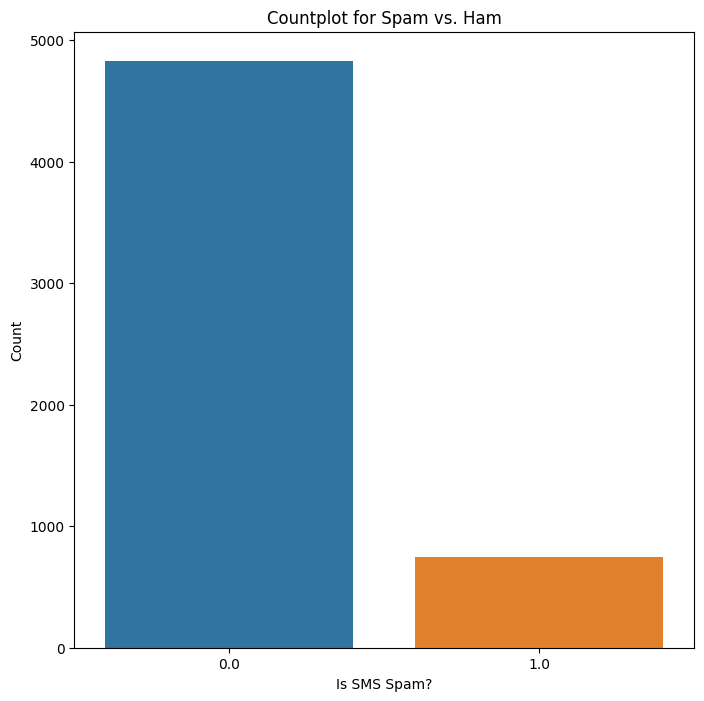

In [82]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='Category', data=SMS_DF)
p = plt.title('Countplot for Spam vs. Ham')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')
print('dataset as imbalanced dataset')

In [69]:
df_majority = SMS_DF[(SMS_DF['Category']==0)] 
df_minority = SMS_DF[(SMS_DF['Category']==1)] 

In [85]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 4827 ,
                                 random_state=42)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

dataset as balanced dataset


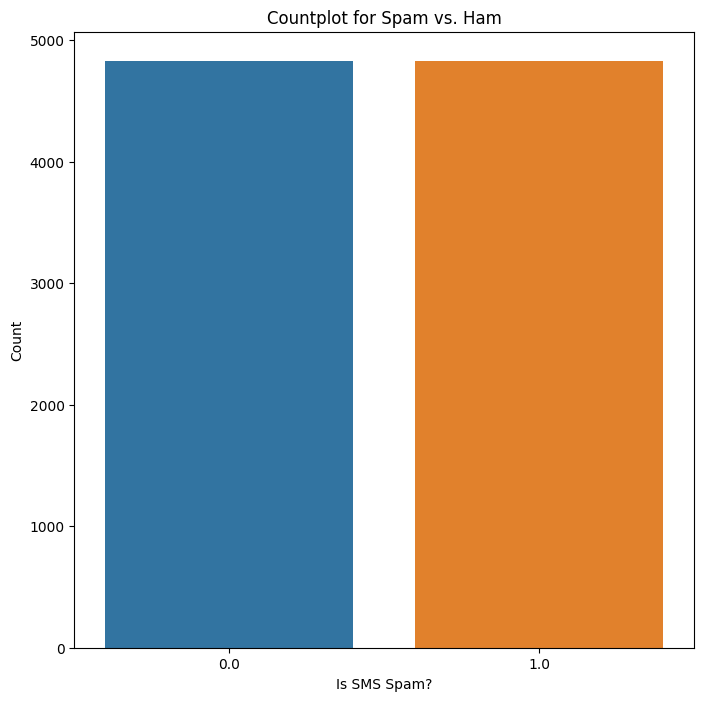

In [86]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='Category', data=df_upsampled)
p = plt.title('Countplot for Spam vs. Ham')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')
print('dataset as balanced dataset')

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_upsampled['Text']) 

In [92]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_upsampled['Category'], test_size=0.2)

In [93]:
# Train model (e.g. Naive Bayes)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [94]:
# Evaluate on test set
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9886069394096323
